In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from matplotlib.colors import ListedColormap 

## セルの数とドロップの種類と平均コンボ数の関係

 4:0.41 -54.30
 5:0.18 -19.72
 6:0.10 -9.85
 7:0.07 -5.88
 8:0.05 -3.92
 9:0.03 -2.66
10:0.03 -1.88


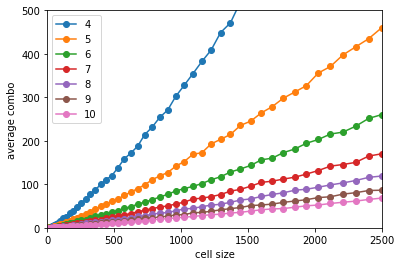

In [9]:
import pandas as pd
from sklearn import datasets, linear_model
coefs = []
df = pd.read_csv("some.csv")
for i in range(4,11):
    means = df[df["kinds"]==i]["mean"]
    heights = df[df["kinds"]==i]["height"]**2
    lin = linear_model.LinearRegression()
    lin.fit(heights.values.reshape(-1,1), means.values.reshape(-1,1))
    print("{:2d}:{:.2f} {:.2f}".format(i,lin.coef_[0,0],lin.intercept_[0]))
    plt.plot(heights, means, "-o",label="{}".format(i))
    coefs.append(lin.coef_[0,0])
plt.legend()
plt.ylim(0,500)
plt.xlim(0,2500)
plt.xlabel("cell size")
plt.ylabel("average combo")
plt.savefig("ochikon.png")

## ドロップ種類と比例係数の関係

0.7530288046578767 -1.429485894232819


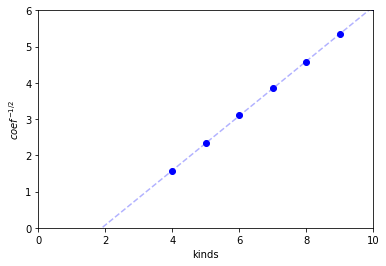

In [10]:
coefs = np.array(coefs)
plt.plot(range(4,11),1/np.sqrt(coefs),"o",color="blue")
lin = linear_model.LinearRegression()
lin.fit(np.array(range(4,11)).reshape(-1,1), np.array(1/np.sqrt(coefs)).reshape(-1,1))
x = np.linspace(1,10,10)
plt.plot(x,x*lin.coef_[0,0]+lin.intercept_,"blue",alpha=0.3,linestyle="--")
# plt.plot(range(4,11),1/coefs,"x",color="red")
plt.ylim(0, 6)
plt.xlim(0,10)
plt.xlabel("kinds")
plt.ylabel("$coef^{-1/2}$")
plt.savefig("relation1.png")
print(lin.coef_[0,0],lin.intercept_[0])


### パズドラコンボ関数
$Combo_\mathrm{average} = \frac{N}{(0.75k-1.43)^2}$
- $k$ : ドロップの種類
- $N$ : セルの数

## 参考1 グラフ

{0, 2}
{1, 3, 4, 5}


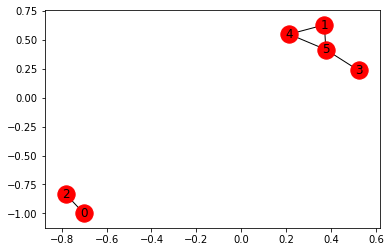

In [11]:
import numpy as np
import networkx as nx
A = [[0, 2 ],[1 ,4 ],[1 ,5] ,[3, 5], [4 ,5]]

G = nx.DiGraph()  # 有向グラフ (Directed Graph)  

G.add_edges_from(A)
G = nx.to_undirected(G)
nx.draw_networkx(G)

for g in nx.connected_components(G):
    print(g)


## 参考2
色

[[-1  0  1  2  3  4  5  6]]


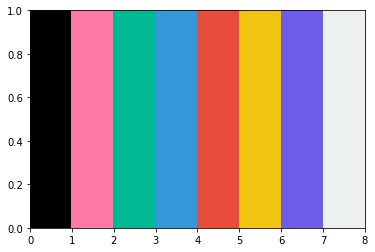

In [12]:
#black pink green blue red yellow purple
colorList = ["#000000",
             "#fd79a8","#00b894","#3498db","#e74c3c","#f1c40f","#6c5ce7",
             "#ecf0f1"]
A = np.random.randint(0,2,(5,5))
A = np.array([[-1,0,1,2,3,4,5,6]])
print(A)
# A[1,1]=-1
a = A.max()
plt.pcolor(A, cmap=ListedColormap(colorList[:a+2]))